In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
sweep_ids = ['g1aqz63h', '845p0uii', 'o3notvc2', 'wxt1oine', 's45fguzh', '7q1kfajs', '4lbohk75', 'ayyanv69']
config_names = ['tl_fast1', 'tl_fast1_aug1', 'tl_fast1_aug2', 'tl_fast1_aug3', 'tl_best5', 'tl_best5_aug1', 'tl_best5_aug2', 'tl_best5_aug3']

In [116]:
import wandb
api = wandb.Api()

In [117]:
metric = 'f1_score'

In [118]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(config_names[i])
        f1_scores.append(run.summary[metric])

In [119]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
35,tl_fast1,devout-sweep-1,0.976330
36,tl_fast1,curious-sweep-2,0.975395
37,tl_fast1,trim-sweep-3,0.979741
38,tl_fast1,ethereal-sweep-4,0.980595
39,tl_fast1,swift-sweep-5,0.979934


In [120]:
f1_df.loc[f1_df['config']=='tl_best5'].sort_values(by=metric)

,config,name,f1_score
15,tl_best5,neat-sweep-1,0.975796
19,tl_best5,major-sweep-5,0.977860
17,tl_best5,dry-sweep-3,0.977965
16,tl_best5,dashing-sweep-2,0.979969
18,tl_best5,logical-sweep-4,0.980402


In [121]:
f1_df.sort_values(by=metric, ascending=False).head()

,config,name,f1_score
5,tl_best5_aug2,dark-sweep-1,0.981552
20,tl_fast1_aug3,amber-sweep-1,0.981259
38,tl_fast1,ethereal-sweep-4,0.980595
18,tl_best5,logical-sweep-4,0.980402
32,tl_fast1_aug1,drawn-sweep-3,0.980217


In [122]:
sns_colours = sns.color_palette()

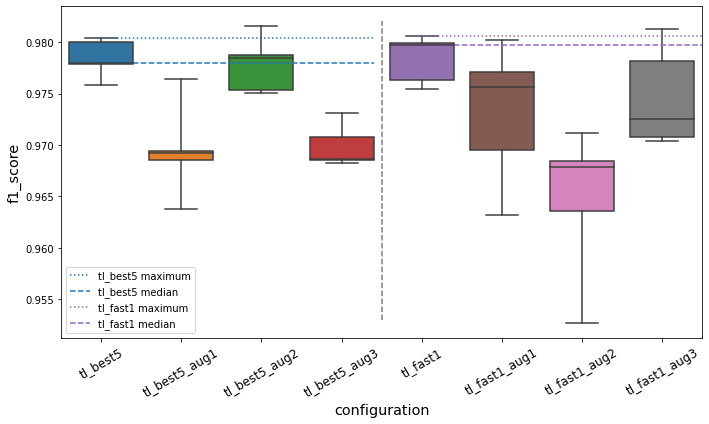

In [125]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='config', y=metric, data=f1_df, whis=100, order=sorted(f1_df['config'].unique()))
#plt.ylim([0.945, 0.985])
plt.hlines(0.980402, 0, 3.4, linestyles='dotted', color=sns_colours[0], label='tl_best5 maximum')
plt.hlines(0.977965, 0, 3.4, linestyles='dashed', color=sns_colours[0], label='tl_best5 median')
plt.hlines(0.980595, 4, 7.5, linestyles='dotted', color=sns_colours[4], label='tl_fast1 maximum')
plt.hlines(0.979741, 4, 7.5, linestyles='dashed', color=sns_colours[4], label='tl_fast1 median')
#plt.hlines(0.973796, -0.5, 9.5, linestyles='dashed', color='grey', label='baseline median')

plt.vlines(3.5, ymin=0.953, ymax=0.982, linestyles='dashed', color='grey')
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large', rotation=30)
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

fig.savefig('../figs/glitches/14_transfer_aug_scores.png', dpi=300)

In [126]:
f1_df.sort_values(by='f1_score', ascending=False).head(10)

,config,name,f1_score
5,tl_best5_aug2,dark-sweep-1,0.981552
20,tl_fast1_aug3,amber-sweep-1,0.981259
38,tl_fast1,ethereal-sweep-4,0.980595
18,tl_best5,logical-sweep-4,0.980402
32,tl_fast1_aug1,drawn-sweep-3,0.980217
16,tl_best5,dashing-sweep-2,0.979969
39,tl_fast1,swift-sweep-5,0.979934
37,tl_fast1,trim-sweep-3,0.979741
7,tl_best5_aug2,faithful-sweep-3,0.978725
9,tl_best5_aug2,tough-sweep-5,0.978502
